# EDA

by: Tristan Dewing

## Importing Packages and Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
url1 = 'https://raw.githubusercontent.com/cmhamakawa/Data_Science_NBA_Project/master/Datasets/preprocessed_nba_dataset.csv'
adv_df = pd.read_csv(url1)
adv_df = adv_df.drop(columns = "Unnamed: 0")
adv_df.head()

,SalStartYr,Salary,Pos,Tm,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_cap,Per_of_Salary_Cap
0,2001,5062500.0,SG,DEN,12,14.5,1.5,3.8,0.387,0.1,...,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,42500000,0.119118
1,2001,11250000.0,SF,VAN,81,40.0,7.5,15.8,0.472,0.1,...,6.9,9.1,3.1,1.1,1.0,2.9,2.9,20.5,42500000,0.264706
2,2001,1995741.0,PG,ORL,0,8.7,0.7,2.2,0.321,0.2,...,1.0,1.0,1.4,0.6,0.0,1.0,1.1,2.0,42500000,0.046959
3,2001,1418400.0,PG,TOT,24,21.3,3.7,8.8,0.417,0.3,...,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,42500000,0.033374
4,2001,11250000.0,SG,MIL,82,38.2,7.7,16.0,0.480,2.5,...,4.0,5.2,4.6,1.5,0.2,2.5,2.3,22.0,42500000,0.264706


## Variables with a Correlation Coefficient with Per_of_Salary_Cap over 0.6

In [10]:
corr = adv_df.drop(columns=["Salary", "salary_cap"]).corr()[["Per_of_Salary_Cap"]]
corr[corr >= 0.6].dropna()

,Per_of_Salary_Cap
MP,0.634941
FG,0.686771
FGA,0.673278
2P,0.662387
2PA,0.660331
FT,0.636532
FTA,0.641344
TOV,0.601738
PTS,0.687659
Per_of_Salary_Cap,1.000000


## Relationship Between Position and Per_of_Salary_Cap

In [11]:
pos_groups = adv_df.groupby('Pos')
pos_groups.describe()["Per_of_Salary_Cap"]

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,921.0,0.103360,0.089409,0.000709,0.031648,0.073657,0.161464,0.585320
C-PF,12.0,0.076870,0.065443,0.012366,0.029908,0.061040,0.101471,0.247103
PF,1231.0,0.100162,0.095886,0.000714,0.025083,0.067230,0.138925,0.638686
PF-C,12.0,0.114624,0.087166,0.015338,0.021900,0.112562,0.184259,0.277296
PF-SF,11.0,0.063446,0.064268,0.004115,0.020183,0.035733,0.085168,0.221255
PG,1291.0,0.082912,0.083890,0.000266,0.021438,0.053967,0.113304,0.394048
PG-SF,1.0,0.330226,NaN,0.330226,0.330226,0.330226,0.330226,0.330226
PG-SG,22.0,0.077263,0.089913,0.007310,0.017311,0.028992,0.116975,0.283617
SF,1241.0,0.088199,0.084711,0.000252,0.021923,0.054407,0.128347,0.489869


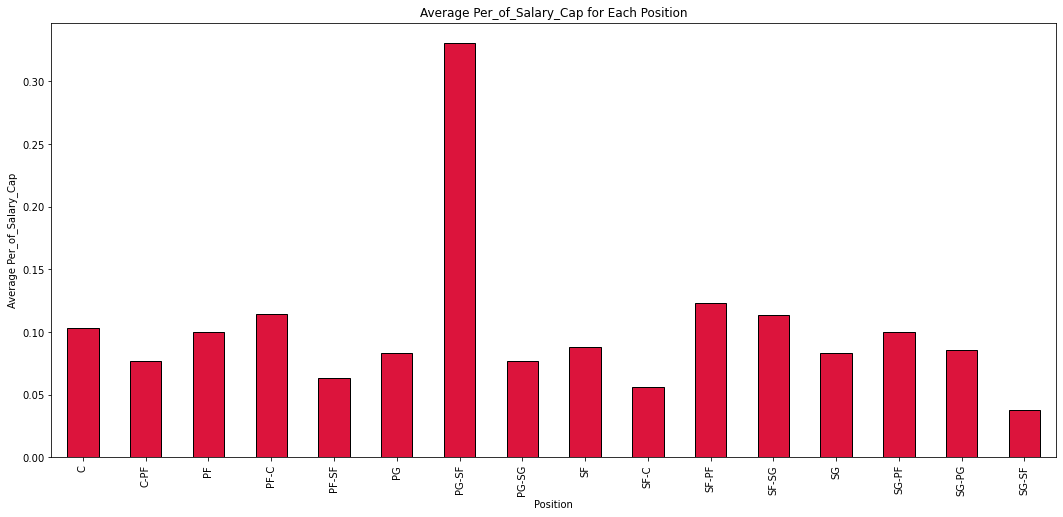

In [20]:
plt.figure(figsize=(18, 8))
pos_groups.mean()["Per_of_Salary_Cap"].plot.bar(color = ["crimson"], edgecolor = "black")
plt.ylabel("Average Per_of_Salary_Cap")
plt.xlabel("Position")
plt.title("Average Per_of_Salary_Cap for Each Position")
plt.show()

Note: Position PG-SF is an outlier with only one player. Two-way position categories have less players overall than single position categories.

## Relationship Between Team and Per_of_Salary_Cap

In [13]:
team_groups = adv_df.groupby('Tm')
team_groups.describe()["Per_of_Salary_Cap"]

,count,mean,std,min,25%,50%,75%,max
Tm,,,,,,,,
ATL,188.0,0.082779,0.079960,0.000758,0.023296,0.053692,0.119005,0.340305
BOS,213.0,0.095810,0.096903,0.000758,0.023000,0.051685,0.127466,0.421812
BRK,83.0,0.091849,0.098757,0.001145,0.016284,0.048181,0.147861,0.367570
CHA,76.0,0.071751,0.057590,0.001317,0.022222,0.059580,0.098729,0.224953
CHH,22.0,0.080937,0.067298,0.010961,0.028530,0.062079,0.115713,0.204941
CHI,188.0,0.081107,0.075611,0.001559,0.022148,0.049288,0.123494,0.302914
CHO,61.0,0.088680,0.072608,0.001762,0.030138,0.070641,0.131190,0.300000
CLE,159.0,0.096104,0.087087,0.000758,0.027539,0.068687,0.117148,0.350000
DAL,188.0,0.098682,0.094032,0.000748,0.021976,0.061526,0.147443,0.387215


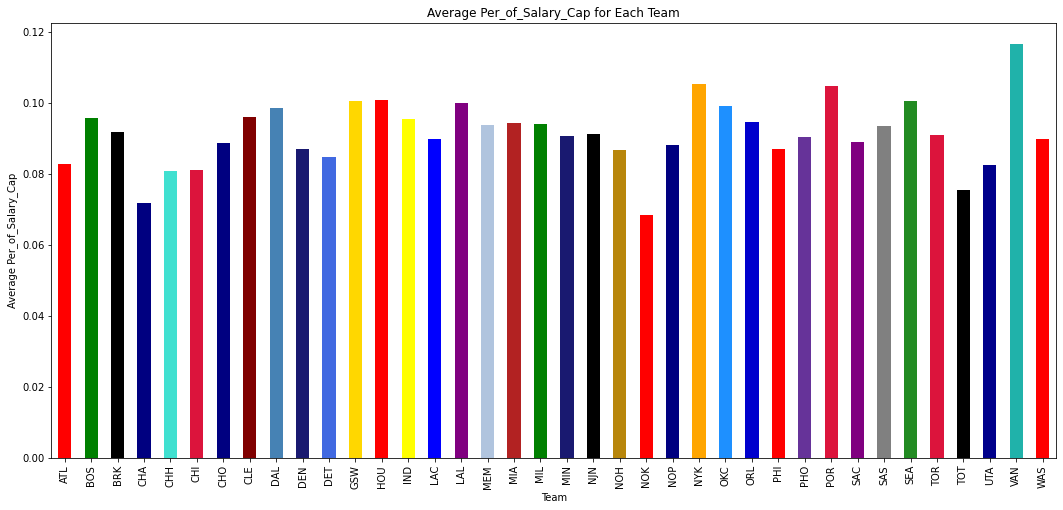

In [14]:
plt.figure(figsize=(18, 8))
team_groups.mean()["Per_of_Salary_Cap"].plot.bar(
    color = ["red", "green", "black", "navy", "turquoise", "crimson", "navy", "maroon",
             "steelblue", "midnightblue", "royalblue", "gold", "red", "yellow", "blue", "purple",
             "lightsteelblue", "firebrick", "green", "midnightblue", "black", "darkgoldenrod", "red",
             "navy", "orange", "dodgerblue", "mediumblue", "red", "rebeccapurple", "crimson", "purple",
             "gray", "forestgreen", "crimson", "black", "darkblue", "lightseagreen", "red"])
plt.ylabel("Average Per_of_Salary_Cap")
plt.xlabel("Team")
plt.title("Average Per_of_Salary_Cap for Each Team")
plt.show()

## Importing New Dataset to Observe Other Variables

In [15]:
url = 'https://raw.githubusercontent.com/cmhamakawa/Data_Science_NBA_Project/master/Datasets/preprocessed_nba_dataset(w_years_of_exp).csv'
adv_df = pd.read_csv(url)
adv_df = adv_df.drop(columns = "Unnamed: 0")
adv_df.columns

Index(['SalStartYr', 'Salary', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'years_of_exp',
       'salary_cap', 'Per_of_Salary_Cap'],
      dtype='object')

## Relationship Between SalStartYr and Per_of_Salary_Cap

In [16]:
year_groups = adv_df.groupby("SalStartYr")
year_groups.describe()["Per_of_Salary_Cap"]

,count,mean,std,min,25%,50%,75%,max
SalStartYr,,,,,,,,
2001,300.0,0.099159,0.093206,0.000668,0.033702,0.070335,0.126176,0.527059
2002,293.0,0.110760,0.109505,0.000927,0.028557,0.074495,0.141398,0.625760
2003,288.0,0.101624,0.096263,0.002038,0.024407,0.068431,0.141138,0.638686
2004,300.0,0.102123,0.095007,0.001034,0.027207,0.068384,0.137668,0.399618
2005,300.0,0.098969,0.088627,0.000632,0.028108,0.070707,0.139293,0.386364
2006,294.0,0.094893,0.087000,0.000457,0.026885,0.065792,0.136135,0.395220
2007,296.0,0.097764,0.089103,0.000759,0.029848,0.069267,0.143139,0.426928
2008,298.0,0.096168,0.087747,0.000798,0.028809,0.064938,0.146702,0.421812
2009,292.0,0.094816,0.087454,0.001332,0.030047,0.064451,0.132582,0.402765


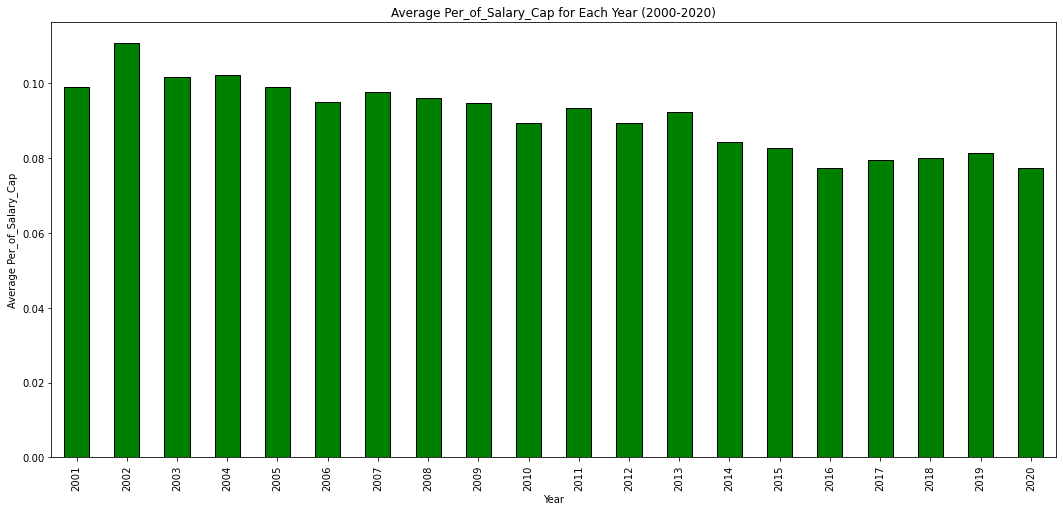

In [17]:
plt.figure(figsize=(18, 8))
year_groups.mean()["Per_of_Salary_Cap"].plot.bar(color = "green", edgecolor = "black")
plt.ylabel("Average Per_of_Salary_Cap")
plt.xlabel("Year")
plt.title("Average Per_of_Salary_Cap for Each Year (2000-2020)")
plt.show()

## Relationship Between years_of_exp and Per_of_Salary_Cap

In [18]:
years_of_exp_groups = adv_df.groupby("years_of_exp")
years_of_exp_groups.describe()["Per_of_Salary_Cap"]

,count,mean,std,min,25%,50%,75%,max
years_of_exp,,,,,,,,
1,879.0,0.025536,0.020210,0.000457,0.012982,0.018315,0.032701,0.111762
2,759.0,0.033225,0.026534,0.000632,0.015245,0.024632,0.043952,0.250000
3,655.0,0.050123,0.039322,0.000372,0.024592,0.040679,0.062831,0.280000
4,562.0,0.099779,0.075695,0.000266,0.034117,0.079235,0.152912,0.307293
5,525.0,0.109922,0.075921,0.000458,0.052566,0.098165,0.159968,0.307938
6,485.0,0.119606,0.082313,0.000759,0.056987,0.105763,0.170771,0.527059
7,446.0,0.128356,0.090121,0.001499,0.056463,0.112107,0.182842,0.625760
8,384.0,0.139604,0.100047,0.001201,0.057436,0.122249,0.204053,0.638686
9,353.0,0.137733,0.100875,0.000881,0.060103,0.111124,0.206193,0.504202


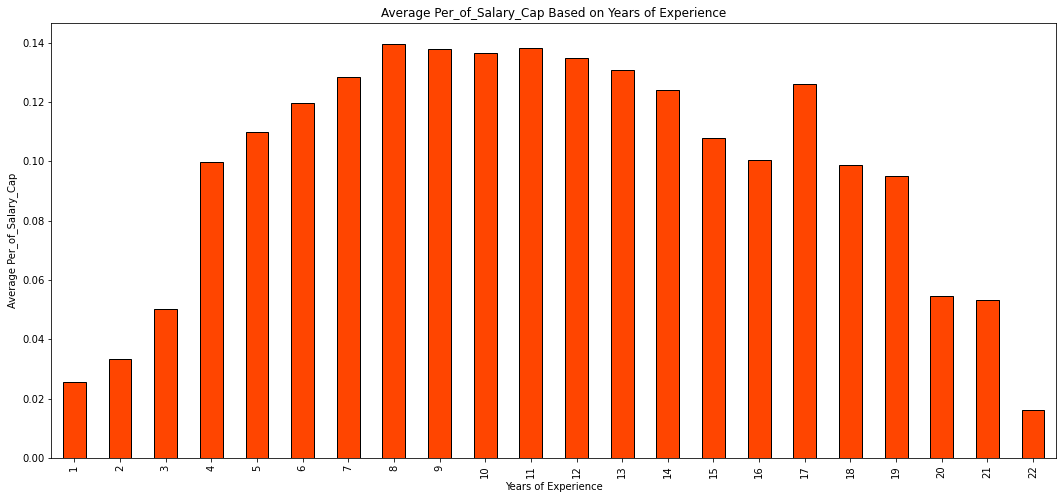

In [19]:
plt.figure(figsize=(18, 8))
years_of_exp_groups.mean()["Per_of_Salary_Cap"].plot.bar(color = "orangered", edgecolor = "black")
plt.ylabel("Average Per_of_Salary_Cap")
plt.xlabel("Years of Experience")
plt.title("Average Per_of_Salary_Cap Based on Years of Experience")
plt.show()